In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm# drRatings = pd.read_excel('./OBGYN_new_train_80000.xlsx',nrows=1000)
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics as metrics
import seaborn as sn
drRatings = pd.read_excel('./OBGYN_new_train_80000.xlsx')
#shuffle the data so that they are in random sequence
drRatings = drRatings.sample(frac=1)
drRatings['highPunctuality'] = (drRatings['punctuality']>4).astype(int)
temp = pd.get_dummies(drRatings['state'])
drRatings = pd.concat([drRatings,temp],axis=1)
del temp
drRatings['postedTime']=pd.to_datetime(drRatings['postedTime'])
drRatings['year']=drRatings['postedTime'].dt.year
drRatings['hour']=drRatings['postedTime'].dt.hour


Optimization terminated successfully.
         Current function value: 0.674984
         Iterations 5
prediction accuracy is 0.5815625


Text(33.0, 0.5, 'highPunctuality')

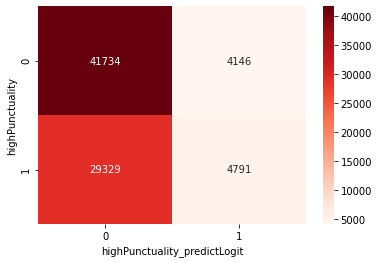

In [ ]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

ycol = 'highPunctuality'
x = drRatings[xcols]
x = sm.add_constant(x)
y = drRatings[ycol]

logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()

drRatings['highPunctuality_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit") 
plt.ylabel("highPunctuality") 

In [ ]:
keywordlist = ['good','bad','time','wait','no']
for keyword in keywordlist:
  drRatings[keyword]=drRatings['review'].apply(lambda x: int(keyword in x))



Optimization terminated successfully.
         Current function value: 0.646484
         Iterations 6
prediction accuracy is 0.6169625


Text(33.0, 0.5, 'highPunctuality')

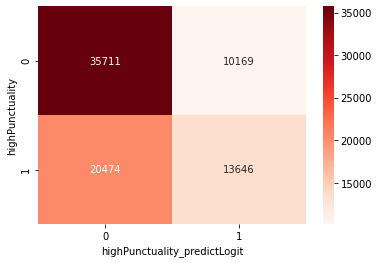

In [ ]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews'] + keywordlist

ycol = 'highPunctuality'
x = drRatings[xcols]
x = sm.add_constant(x)
y = drRatings[ycol]

logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()

drRatings['highPunctuality_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit") 
plt.ylabel("highPunctuality") 

In [ ]:
import re
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

def preprocess(text):
  text = text.lower() #lowercase
  text = re.sub(r'[^\w\s]', '', text) #remove punctuations
  text = re.sub(r'\d+', '', text) #remove numbers
  text = " ".join(text.split()) #stripWhitespace
  text = text.split()
  text = [x for x in text if x not in stop_words] #remove stopwords
  text = [x for x in text if x not in ["dr", "doctor"]] #remove task specific stopwords
  text = " ".join(text)
  # stemmer_ps = PorterStemmer()  
  # text = [stemmer_ps.stem(word) for word in text.split()] #stemming
  # text = " ".join(text)
  # lemmatizer = WordNetLemmatizer()
  # text = [lemmatizer.lemmatize(word) for word in text.split()]  #lemmatization
  # text = " ".join(text)
  return(text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction 
stop_words = feature_extraction.text.ENGLISH_STOP_WORDS
stop_words = ["dr", "doctor"] + list(stop_words)

def calTFIDF(texts,max_features=None):
  vectorizer = TfidfVectorizer(max_features=max_features,lowercase=True,stop_words=stop_words,ngram_range=(1,1))
  TFIDF = vectorizer.fit_transform(texts)
  TFIDF=pd.DataFrame(TFIDF.toarray(),columns=vectorizer.get_feature_names())
  return(TFIDF)


In [ ]:
drRatings['text'] = drRatings['review'].apply(lambda x:preprocess(x))

In [ ]:
TFIDF=calTFIDF(drRatings['text'],max_features=6)
TFIDF

,great,like,office,recommend,staff,time
0,0.000000,0.000000,0.00000,1.0,0.000000,0.000000
1,0.000000,0.000000,1.00000,0.0,0.000000,0.000000
2,0.000000,0.000000,0.00000,0.0,1.000000,0.000000
3,0.000000,0.000000,1.00000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.00000,0.0,0.335849,0.941916
...,...,...,...,...,...,...
79995,0.000000,0.000000,0.75697,0.0,0.000000,0.653450
79996,0.297688,0.312112,0.86228,0.0,0.265408,0.000000
79997,0.000000,0.000000,0.75697,0.0,0.000000,0.653450
79998,0.000000,0.000000,0.00000,0.0,0.000000,0.000000


Optimization terminated successfully.
         Current function value: 0.657067
         Iterations 5
prediction accuracy is 0.6092


Text(33.0, 0.5, 'highPunctuality')

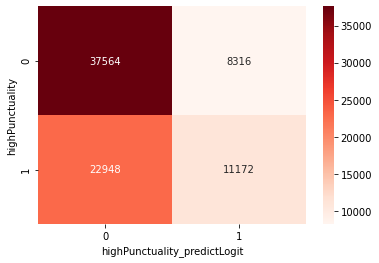

In [ ]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

ycol = 'highPunctuality'
x = drRatings[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF.values],axis=1)
y = drRatings[ycol]

logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()

drRatings['highPunctuality_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit") 
plt.ylabel("highPunctuality") 

In [ ]:
TFIDF=calTFIDF(drRatings['text'],max_features=250)
TFIDF

,able,absolutely,actually,ago,amazing,answer,answered,answers,appointment,appointments,appt,area,ask,asked,away,awesome,babies,baby,bad,bedside,believe,best,better,birth,blood,busy,called,calls,came,care,cares,caring,check,child,children,come,comfortable,compassionate,completely,complications,...,think,thorough,thought,time,times,told,took,treated,treatment,truly,trust,trying,ultrasound,understand,understanding,unprofessional,use,visit,visits,wait,waited,waiting,want,wanted,wasnt,way,week,weeks,went,wish,woman,women,wonderful,work,worst,worth,wouldnt,wrong,year,years
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.24712,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.219257,0.0,0.000000,0.000000,0.172492,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.189503,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.192622,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.214624,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.284716,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.862816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.303058,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.305962,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.197781
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.196128,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.232545,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.382349,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.188449,0.258126,0.229257,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.251203,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.228256,0.0,0.0,0.0,0.0,0.000000,0.0,0.306757,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.108923,0.0,0.158910,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.221013,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.211975,0.000000
79996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.220914,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.195563,

Optimization terminated successfully.
         Current function value: 0.528822
         Iterations 7
prediction accuracy is 0.7288


Text(33.0, 0.5, 'highPunctuality')

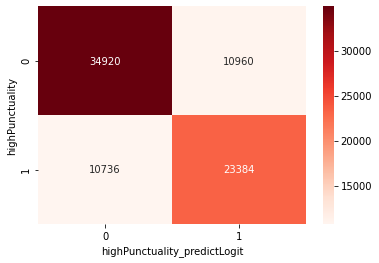

In [ ]:
TFIDF.columns = ['tfidf_'+x for x in TFIDF.columns]
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA','CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

ycol = 'highPunctuality'
x = drRatings[xcols].values
x = sm.add_constant(x)
x = np.concatenate([x,TFIDF.values],axis=1)
y = drRatings[ycol]


logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()

drRatings['highPunctuality_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
print('prediction accuracy is',acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
# print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit") 
plt.ylabel("highPunctuality") 